### Efficient Distributed Community Detection in the Stochastic Block Model
arXiv:1904.07494v1 [cs.DC] 16 Apr 2019

CDRW(Community Detection by Random Walks) - Algorithm implementation

1. Graph G = (V, E) has stationary distribution over vertices 
$\pi(v) = d(v)/2m$, where $m = |E|$. 

2. Take subset S of vertices with all edges from them. Introduce volume
    $\mu(S) = \sum_{u \in S} d(u)$

3. If we start random walk from the vertex s, it will reach stationary configuration
    after a time called mixing time $\tau^{mix}_{s}$. Maximum of this mixing times from 
    all possible vertices $s \in V$ is the mixing time of G 
    $\tau^{mix} = \max_{s\in V} \tau^{mix}_{s}$

4. $\tau_s^{mix}(\epsilon) = \min_{t} \{t : ||\bf{p}_t(v) - \bf{\pi}(v)||_1 < \epsilon \}$ 

#### Generation of random Stochastic Block Model Graph (SBM)

Generate graph with $n=kr$ nodes, $r$ communities, probability $p$ of an edge between
nodes in the same community and probability $q$ for edge between nodes from different communities. 

This graph is further denoted as $G(k, r, p, q)$

In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt 


In [52]:
from math import sqrt

def generate_ER(s, p):
    r"""
    Generator of Erdos-Renyi graphs with probability p of edge
    between nodes s.

    Args:
        s: set of nodes from community
        p: probability of an edge between community members
    """
    k = len(s)
    adj_list = {node : set() for node in s}
    # Each edge can be drawn twice, so pt^2 + 2*pt*(1-pt) == p.
    pt = 1 - sqrt(1-p) 
    probs = torch.rand(size=(k*(k-1), ))

    i = 0
    for v in adj_list:
        for u in adj_list:
            if u != v:
                if probs[i] <= pt:
                    adj_list[v].add(u)
                    adj_list[u].add(v)
                i += 1

    return adj_list


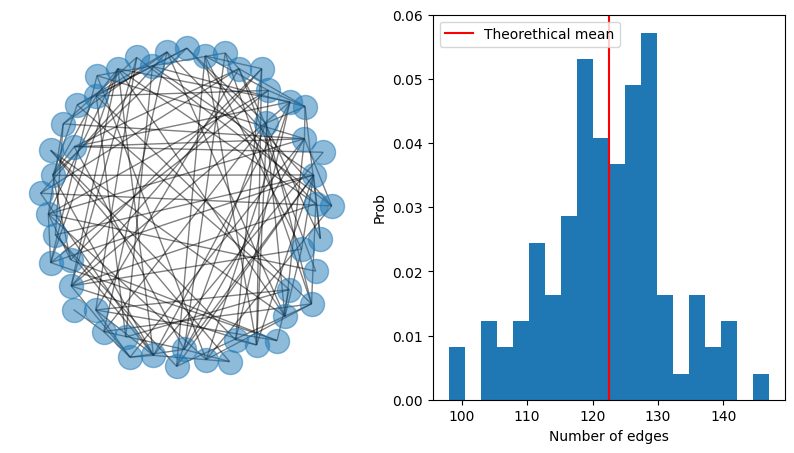

In [57]:
n = 50
p = 0.1
s = set(range(n))
mean = n*(n-1)/2 * p
iters = int(1e2)
res = []
for _ in range(iters):
    adj_list = generate_ER(s, p)
    G = nx.from_dict_of_lists(adj_list)
    res.append(len(G.edges))


plt.figure(figsize=(10,5))
plt.subplot(121)
G = nx.from_dict_of_lists(adj_list)
pos = nx.spring_layout(G, k=10)
nx.draw(G, pos=pos, alpha=0.5)

plt.subplot(122)
plt.hist(res, density=True, bins=20)
plt.axvline(mean, color='red', label='Theorethical mean')
plt.xlabel('Number of edges')
plt.ylabel('Prob')
plt.legend()